### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

### 기본 그래프

+ 선(line), 막대(bar), 히스트그램(histogram), 산포도(scatter), 상자(box)

### 질적 데이터

+ 요약 방법 : 도표
+ 정리 방법 : 도수 분포표, 분할표
+ 그래프 : 막대 그래프, 원 그래프(파이 그래프), ...


### 양적 데이터

+ 요약 방법 : 수치
+ 정리 방법 : 산술평균, 중앙값, ...
+ 그래프 : 히스토그램, Boxplot, Scatter plot(산포도), 시계열(선) 그래프, ...


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 설정
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 선 그래프

<AxesSubplot:>

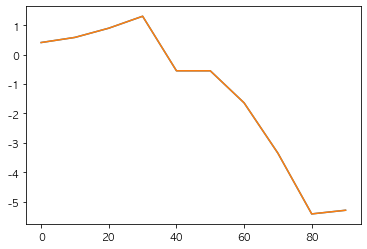

In [108]:
# cussum : 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산하는 함수

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s
s.plot()
s.plot.line()

<AxesSubplot:>

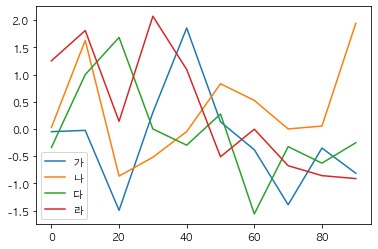

In [109]:
df1 = pd.DataFrame(np.random.randn(10,4),columns=['가','나','다','라'],
                  index=np.arange(0, 100, 10))
df1
df1.plot()

<AxesSubplot:>

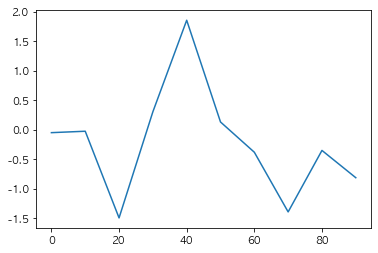

In [110]:
df1['가'].plot()

# 2. 막대 그래프

<AxesSubplot:>

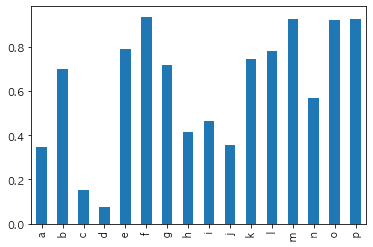

In [111]:
# 세로 그래프

s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2
s2.plot(kind='bar')

<AxesSubplot:>

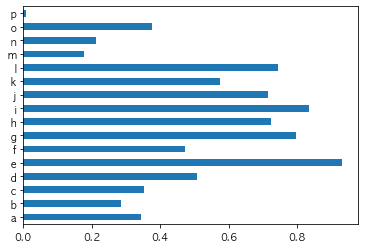

In [112]:
# 가로 그래프

s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2
s2.plot(kind='barh')

<AxesSubplot:>

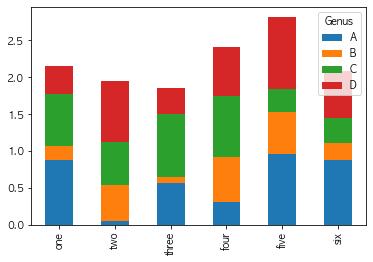

In [113]:
df2 = pd.DataFrame(np.random.rand(6,4),
                  index=['one','two','three','four','five','six'],
                  columns=pd.Index(['A','B','C','D'], name='Genus'))
df2.plot(kind='bar',stacked=True)


<AxesSubplot:>

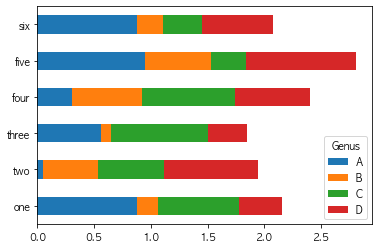

In [114]:
df2.plot(kind='barh',stacked=True)

# 3. histogram

+ X변수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스는 필요 없다

<AxesSubplot:>

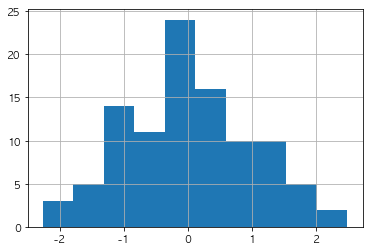

In [115]:
s = pd.Series(np.random.normal(0,1,size=100))
s
s.hist()

<AxesSubplot:>

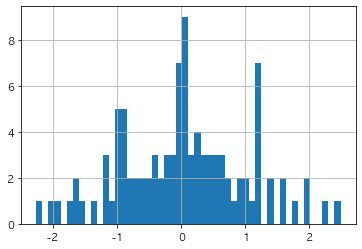

In [116]:
s.hist(bins=50) # 막대의 개수

# 4. 산포도(산점도, Scatter Plot)

+ 두 변수의 관계를 확인 : 양,음

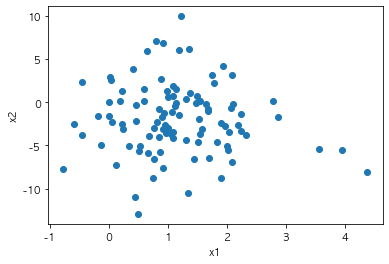

In [117]:
x1 = np.random.normal(1,1, size=(100,1))
x1

x2 = np.random.normal(-2,4, size=(100,1))
x2

x = np.concatenate((x1,x2),axis=1) # 연결
x[:5]

df = pd.DataFrame(x, columns=['x1','x2'])
df

df.plot.scatter('x1','x2') # 산포도
plt.scatter(df['x1'],df['x2'])

# 5. 상자 그래프(Boxplot)

<AxesSubplot:>

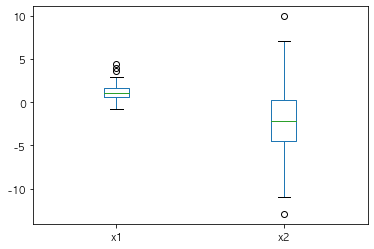

In [118]:
df.plot.box()

# 6. 활용  예제1

+ seaborn의 tips를 이용

### 1) 데이터 준비

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2) total_bill에 대한 금액 분포 확인

Text(0, 0.5, 'total_bill')

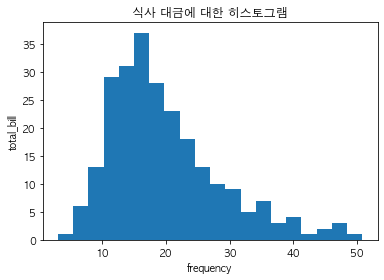

In [120]:
# tips['total_bill'].hist()

fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1행 1열의 하나의 그래프 생성
ax.hist(tips['total_bill'],bins=20)
ax.set_title("식사 대금에 대한 히스토그램") # 타이틀
ax.set_xlabel('frequency') # x축 라벨
ax.set_ylabel('total_bill') # y축 라벨

### 3) total_bill tip의 관계를 알고 싶다.

Text(0, 0.5, 'tip')

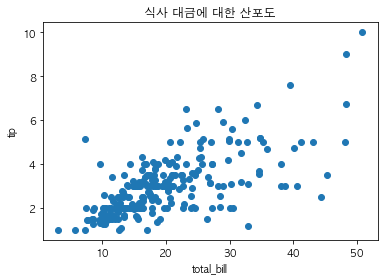

In [121]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1행 1열의 하나의 그래프 생성

ax.scatter(tips['total_bill'],tips['tip'])
ax.set_title("식사 대금에 대한 산포도") # 타이틀
ax.set_xlabel('total_bill') # x축 라벨
ax.set_ylabel('tip') # y축 라벨

### 4) 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'tip')

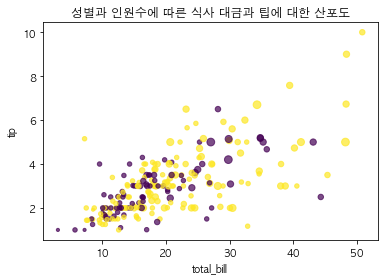

In [122]:
# 성별 함수 생성
def record_sex(sex):
    if sex=='Female':
        return 0
    else:
        return 1
    
#############################

tips['sex_color'] = tips['sex'].apply(record_sex)
tips

fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1행 1열의 하나의 그래프 생성

# ax.scatter(tips['total_bill'],tips['tip'], c=tips['sex_color'], alpha=0.7)
# ax.set_title("성별에 따른 식사 대금과 팁에 대한 산포도") # 타이틀
ax.scatter(tips['total_bill'],tips['tip'], c=tips['sex_color'], alpha=0.7,
          s = tips['size']*10)
ax.set_title("성별과 인원수에 따른 식사 대금과 팁에 대한 산포도") # 타이틀
ax.set_xlabel('total_bill') # x축 라벨
ax.set_ylabel('tip') # y축 라벨

### 5) 성별과 팁의 관계

Text(0, 0.5, 'tip')

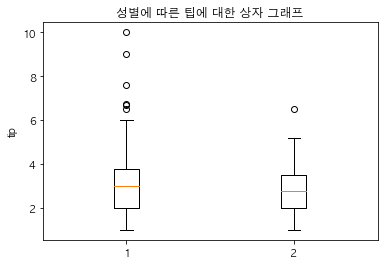

In [123]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1행 1열의 하나의 그래프 생성

ax.boxplot([tips[tips['sex']=='Male']['tip'],tips[tips['sex']=='Female']['tip']])
ax.set_title("성별에 따른 팁에 대한 상자 그래프") # 타이틀
ax.set_ylabel('tip') # y축 라벨

# 7. 활용 예제 2

+ 전국 신규 민간 아파트 분양가격 동향

### 1) 데이터 준비
+ https://data.go.kr/dataset/3035522/fileData.do

In [43]:
# 데이터 불러오기 및 확인
apart = pd.read_csv('/Users/dofany/Jupyter_Workspace/data/20200331.csv',encoding = 'euc-kr')
apart = apart.dropna(axis=0, how='any') # 결측치 제거
apart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4276 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4276 non-null   object
 1   규모구분     4276 non-null   object
 2   연도       4276 non-null   int64 
 3   월        4276 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 200.4+ KB


In [44]:
# column 이름을 영어로 변경(city, size, year, month, price)

apt1 = apart # 데이터프레임 복사
apt1.columns = ['city','size','year','month','price'] # 컬럼명 변경
apt1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4276 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4276 non-null   object
 1   size    4276 non-null   object
 2   year    4276 non-null   int64 
 3   month   4276 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 200.4+ KB


In [45]:
# , price는 숫자(float)로 데이터 타입 변경
apt1['price'] = pd.to_numeric(apt1['price'].str.strip()) # 공백 제거 후 숫자데이터로 변경
apt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4276 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4276 non-null   object 
 1   size    4276 non-null   object 
 2   year    4276 non-null   int64  
 3   month   4276 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 200.4+ KB


In [46]:
%%time
# 서울만 선택해서 '전체' size만 확인
apt_sa = apt1[(apt1["city"] == "서울") & (apt1['size']=='전체')]
apt_sa.head()

CPU times: user 2.02 ms, sys: 92 µs, total: 2.11 ms
Wall time: 2.05 ms


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0


In [48]:
%%time
apt1.query('(city == "서울")and(size =="전체")').head()

CPU times: user 4.21 ms, sys: 440 µs, total: 4.65 ms
Wall time: 4.23 ms


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0


In [55]:
# size컬럼 삭제하고 다중index로(year, month) 조정
apt_sa1 = apt_sa.drop(['city','size'],axis=1)
apt_sa1.head()

,year,month,price
0,2015,10,5841.0
85,2015,11,6050.0
170,2015,12,6041.0
255,2016,1,6108.0
340,2016,2,6111.0


In [56]:
apt_sa1 = apt_sa1.set_index(["year","month"])
apt_sa1.head(10)

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0

<AxesSubplot:xlabel='year,month'>

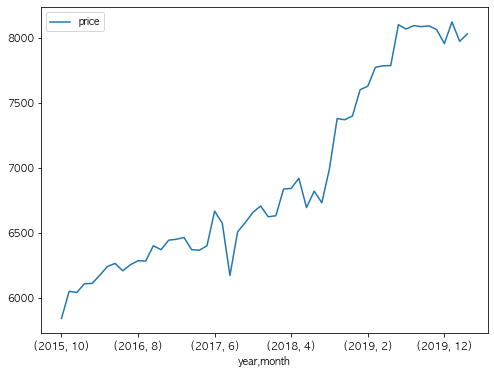

In [59]:
# 서울지역 전체 크기별 월별 제곱미터 당 가격(천원단위) 변화 추이를 그래프로 출력 
apt_sa1.plot(figsize=(8,6))

# 8. seaborn

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(18.200000000000003, 0.5, 'total_bill')

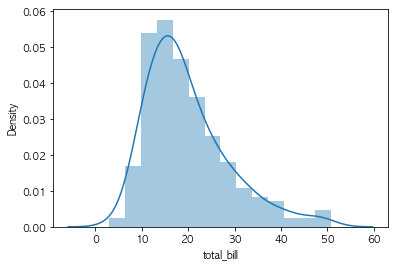

In [124]:
### total_bill에 대한 금액 분포 확인

sns.distplot(tips['total_bill'])

ax.set_title("식사 대금에 대한 히스토그램") # 타이틀
ax.set_xlabel('frequency') # x축 라벨
ax.set_ylabel('total_bill') # y축 라벨

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(18.200000000000003, 0.5, 'total_bill')

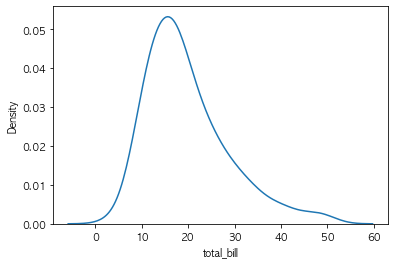

In [128]:
# 선만 표현

sns.distplot(tips['total_bill'],hist = False)

ax.set_title("식사 대금에 대한 히스토그램") # 타이틀
ax.set_xlabel('frequency') # x축 라벨
ax.set_ylabel('total_bill') # y축 라벨

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(18.200000000000003, 0.5, 'total_bill')

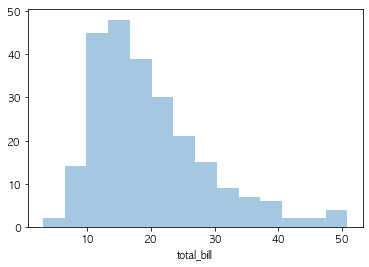

In [129]:
# 막대만 표현

sns.distplot(tips['total_bill'],kde = False)

ax.set_title("식사 대금에 대한 히스토그램") # 타이틀
ax.set_xlabel('frequency') # x축 라벨
ax.set_ylabel('total_bill') # y축 라벨

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

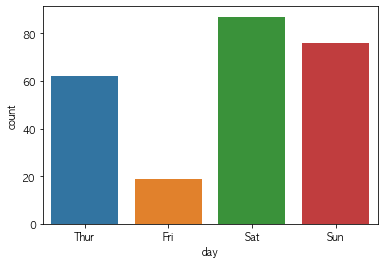

In [130]:
# 요일별 인원 빈도수 나타내기

sns.countplot('day',data=tips)


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

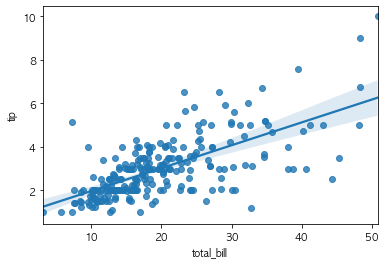

In [131]:
# 직선과 산포도를 동시에 표현

sns.regplot(x='total_bill', y ='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

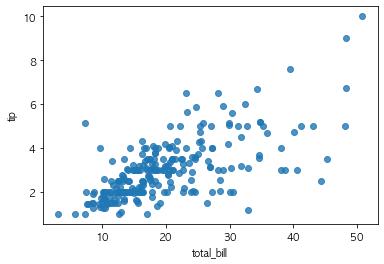

In [132]:
# 산포도만 표현

sns.regplot(x='total_bill', y ='tip', data=tips, fit_reg=False)

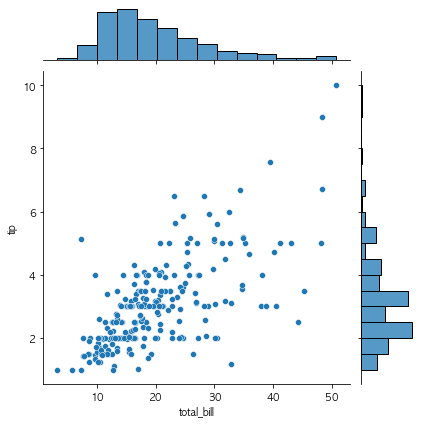

In [133]:
# 히스토그램과 산포도를 합쳐서 표현

sns.jointplot(x='total_bill', y='tip', data=tips)

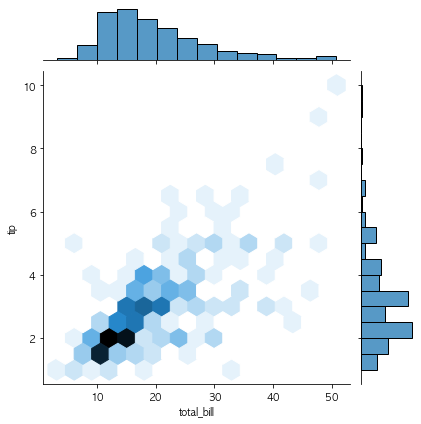

In [134]:
# 산포도 (두껍게)벌집모양

sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

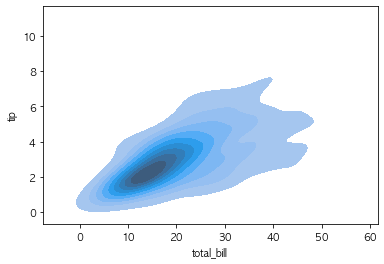

In [135]:
# 그림자 효과

sns.kdeplot(x = 'total_bill', y="tip", data=tips, shade=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

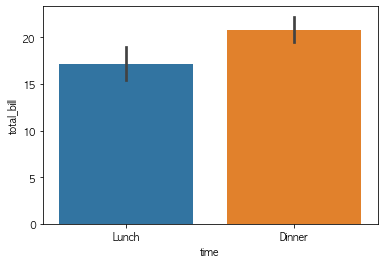

In [136]:
sns.barplot(x='time', y='total_bill', data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

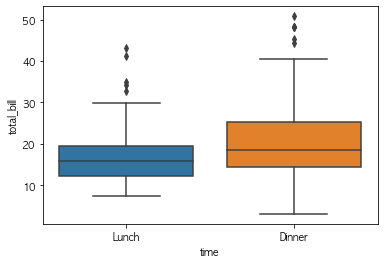

In [138]:
# 상자그래프

sns.boxplot(x='time', y='total_bill', data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

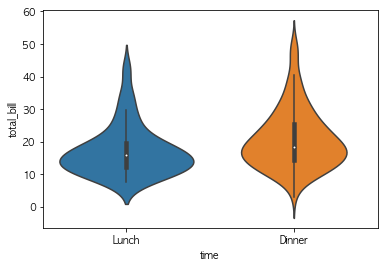

In [139]:
# 바이올린 모양 분포도
sns.violinplot(x='time', y='total_bill', data=tips)

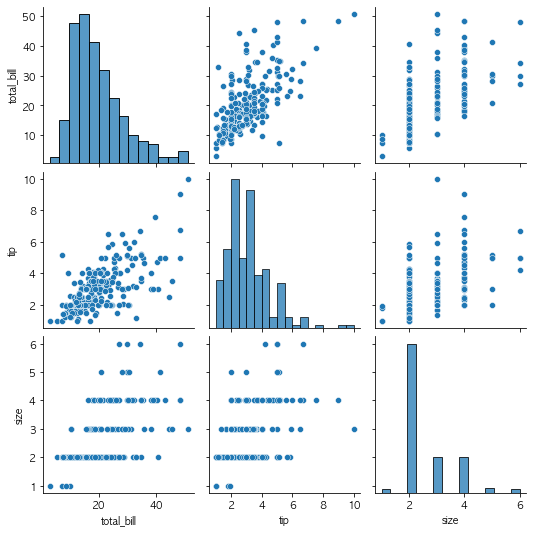

In [3]:
# 숫자형 column의 전체적인 그래프를 보여줄때 사용
sns.pairplot(tips)

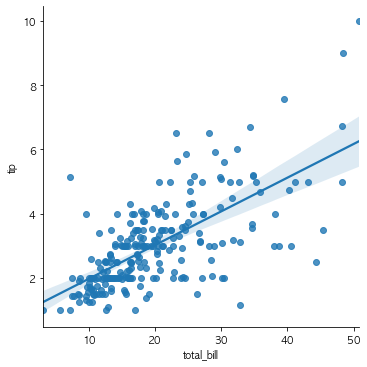

In [100]:
### 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

sns.lmplot(x='total_bill', y='tip', data=tips)

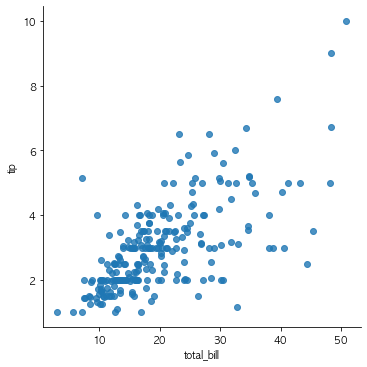

In [99]:
# 산포도만 표현
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False)

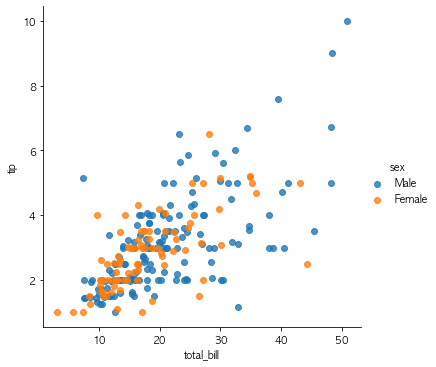

In [101]:
# 자동으로 색상 배분 
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex')

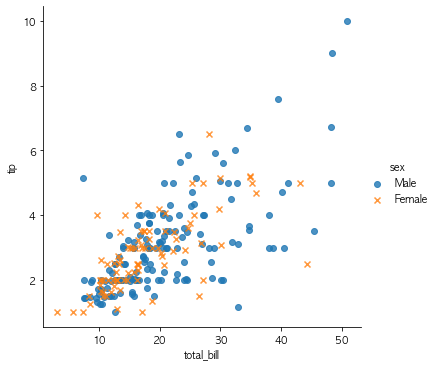

In [104]:
# 점의 모양 변경
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o','x'])

# 9. 활용 예제2
+ https://kaggle.com/c/titanic

### 1) 데이터 준비

In [8]:
train = pd.read_csv('/Users/dofany/dofany_study/R/data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(train.shape)
train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2) EDA

In [11]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True)

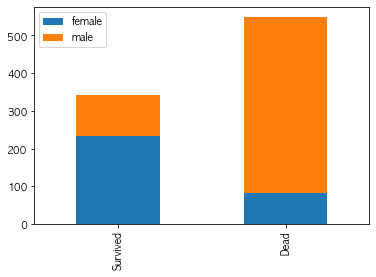

In [12]:
bar_chart('Sex')

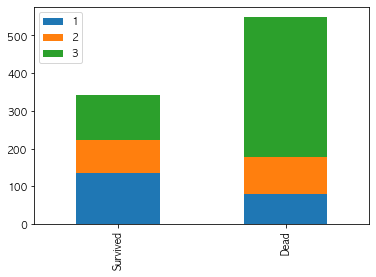

In [13]:
bar_chart('Pclass')

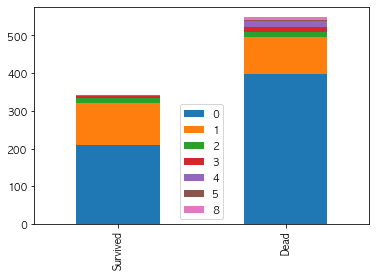

In [14]:
bar_chart('SibSp')

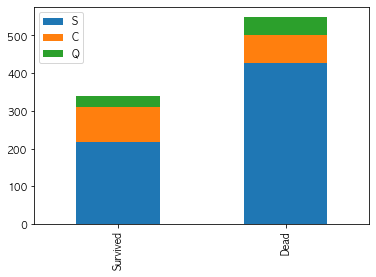

In [15]:
bar_chart('Embarked')

### 3) Feature Engineering

In [22]:
### Name
train["title"] = train["Name"].str.extract(" ([A-Za-z]+)\.")
train["title"].value_counts()

title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Mile":3, "Col":3, "Major":3, "Countess":3,
                "Jonkheer":3, "Capt":3, "Mme":3, "Sir":3, "Don":3, "Lady":3, "Ms":3}

train['title'] = train['title'].map(title_mapping)
train['title'].value_counts()

0.0    517
1.0    182
2.0    125
3.0     65
Name: title, dtype: int64

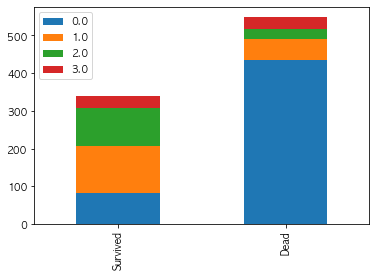

In [23]:
bar_chart("title")

In [33]:
### Age

train["Age"].fillna(train.groupby("title")["Age"].transform("median"),inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        889 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


(30.0, 40.0)

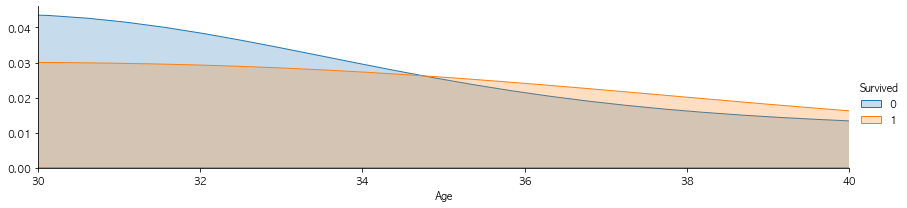

In [39]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim=(0, train["Age"].max()))
plt.xlim(30,40)

# 10. 지도 시각화
+ conda install -c conda-forge folium

In [89]:
import folium

In [90]:
# map = folium.Map(location=[37.497911, 127.027558]) # 전국으로 표시
# map = folium.Map(location=[37.497911, 127.027558], zoom_start=15) # 대로 및 길로 표시
map = folium.Map(location=[37.497911, 127.027558], zoom_start=15, tiles="Stamen Toner") # 도로명으로 표시
map


### 1) 미국 50개주의 실업률 표시

In [91]:
state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [92]:
state_geo = "data/map/folium_us-states.json"

map = folium.Map(location=[40, -98], zoom_start=4) # 배경
map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id",
              columns=['State',"Unemployment"], fill_color="YlGn") # fill : 노란색에서 초록색으로 

map


/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### 2) Marking

In [93]:
map = folium.Map(location=[37.497911, 127.027558], zoom_start=15)


# 마커 생성
# marker = folium.Marker(location=[37.497911, 127.027558], icon=folium.Icon(color='red', icon='star'))
# marker.add_to(map)

# 클릭 설명란 생성
marker = folium.Marker(location=[37.497911, 127.027558], icon=folium.Icon(color='red', icon='star'),
                      popup="강남역 근처").add_to(map)

# 주변에 원 생성
folium.CircleMarker(location=[37.497911, 127.027558],popup="강남역 근처",
                   radius=50, color="#ffffgg", fill_color="fffggg").add_to(map) # radius : 원의 크기
map



In [94]:
# 텍스트 창 생성

from folium import IFrame

map = folium.Map(location=[37.497911, 127.027558], zoom_start=15)
text = "많은 양의 텍스트 데이터 입력"

iframe = folium.IFrame(text, width=700, height=180)
pop = folium.Popup(iframe, max_width=3000)

child = folium.Marker(location=[37.497911, 127.027558], popup=pop, icon=folium.Icon(icon_color="green"))
map.add_child(child)

map

# 11. WordCloud
+ pip install wordcloud

In [2]:
from wordcloud import WordCloud,STOPWORDS

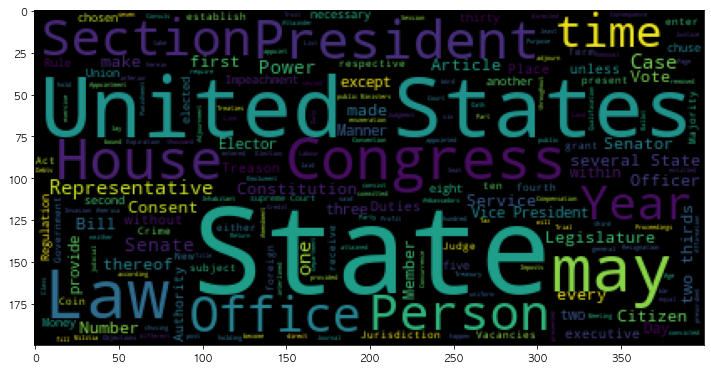

In [3]:
text = open("/Users/dofany/dofany_study/python/analysis/wordcloud/constitution.txt")
text = text.read()
text

wc = WordCloud().generate(text)
dir(wc) 
wc.words_ # 각각의 단어를 뽑아서 그거에 대한 빈도수 확률 계산

plt.figure(figsize=(12, 12))
plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

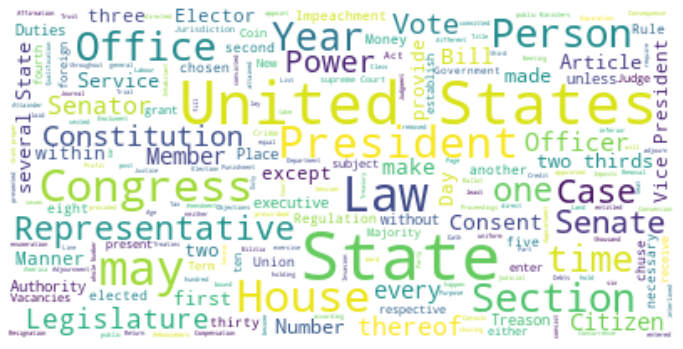

In [97]:
wc = WordCloud(max_font_size=40, background_color='white').generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear') # 보정 
plt.axis("off") # 축에 대한 내용 생략

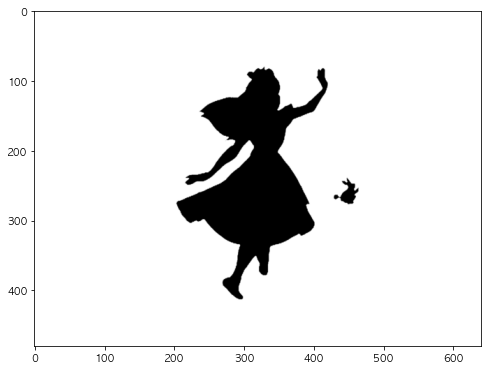

In [98]:
from PIL import Image

# 이미지를 숫자로 바꿔서 불러와야함
alice_mask = np.array(Image.open("/Users/dofany/dofany_study/python/analysis/wordcloud/alice_mask.png"))
alice_mask

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

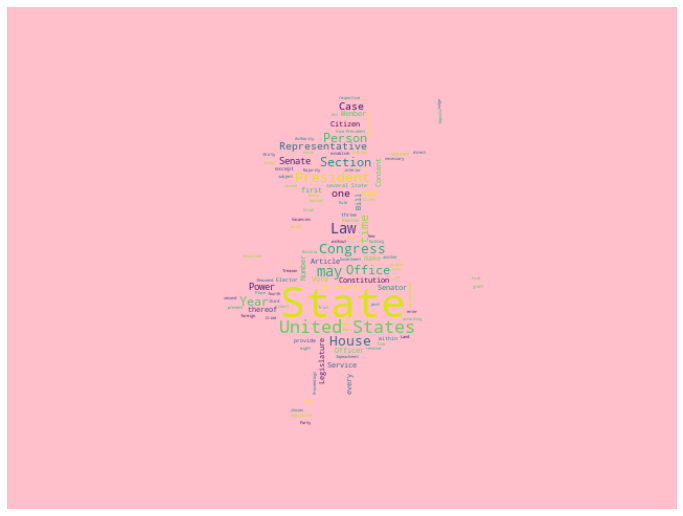

In [99]:
wc = WordCloud(max_font_size=40, background_color='pink', mask=alice_mask).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

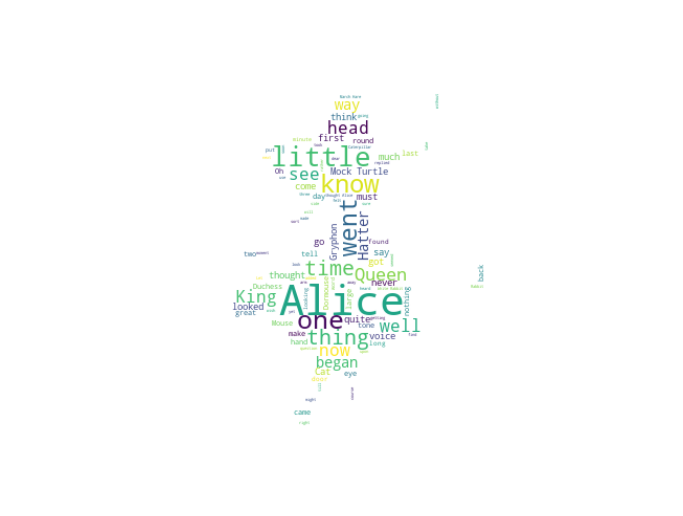

In [100]:
#wc = WordCloud(max_font_size=40, background_color='pink', mask=alice_mask).generate(text)

text = open("/Users/dofany/dofany_study/python/analysis/wordcloud/alice.txt").read()
text

stopwords = STOPWORDS # text에 포함되어있는 단어는 제외
stopwords.add("said")

wc = WordCloud(max_font_size=40, background_color='white', mask=alice_mask,
              stopwords=stopwords, max_words=500).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

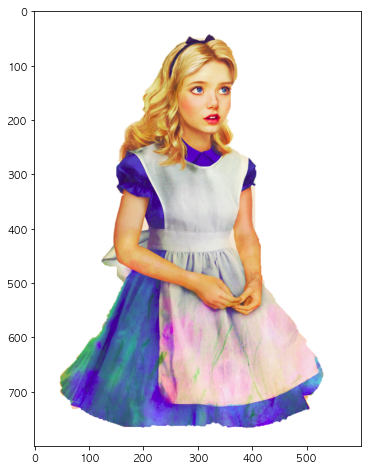

In [101]:
alice_color=np.array(Image.open("wordcloud/alice.png"))
alice_color

plt.figure(figsize=(8,8))
plt.imshow(alice_color)

(-0.5, 599.5, 799.5, -0.5)

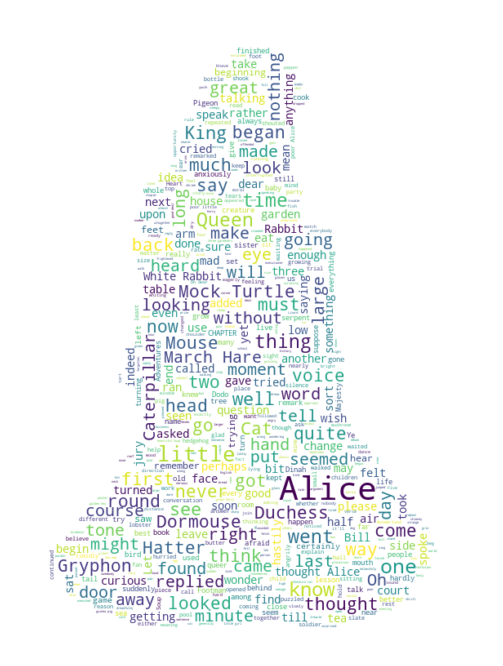

In [102]:
wc = WordCloud(max_font_size=40, background_color='white', mask=alice_color,
              stopwords=stopwords, max_words=500).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 599.5, 799.5, -0.5)

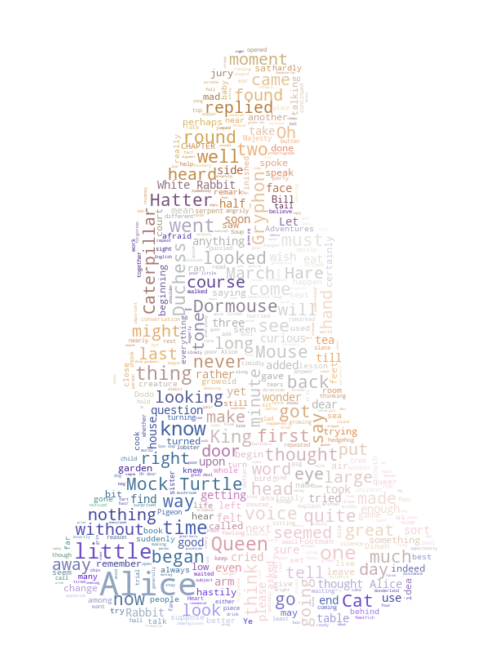

In [17]:
import wordcloud

wc = WordCloud(max_font_size=40, background_color='white', mask=alice_color,
              stopwords=stopwords, max_words=500).generate(text)

image_colors = wordcloud.ImageColorGenerator(alice_color)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func = image_colors), interpolation='bilinear')
plt.axis("off")

In [38]:
# http://konlpy.org
# pip install konlpy
# https://www.lfd.uci.edu/~gohlke/pyhonlibs/#jpype

from konlpy.tag import Okt
from konlpy.corpus import kolaw

In [39]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 형태소 분석
okt = Okt()
okt.nouns(ko_text)

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애',
 '로써',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '질서',
 '더욱',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '향상',
 '기하',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '함',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '제정',
 '차',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '제',
 '장',
 '강',
 '제',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '제',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '정',
 '국가',
 '법률',
 '정',
 '바',
 '재외국민',
 '보호',
 '의무',
 '제',
 '대한민국',
 '영토',
 '한반도',
 '그',
 '부속',
 '도서',
 '제',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '제',
 '대한민국',
 '국제',
 '평화',
 '

In [41]:
text = "아버지가방에들어가신다"
okt.pos(text)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]